In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ev(start, axis, t, shots=1000):
    qc = QuantumCircuit(1, 1)

    if start == '0':
        pass
    elif start == '+':
        qc.h(0)
    else:
        raise ValueError("start must be '0' or '+'")
    
    qc.rx(2*t, 0)

    # expectation value
    if axis == 'x':
        qc.h(0)
    elif axis == 'z':
        pass
    else:
        raise ValueError("axis must be 'x' or 'z'")
    qc.measure(0, 0)

    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # print(np.round(np.cos(t)**2-np.sin(t)**2, 4)) # theoretical expectation value
    return (counts.get('0', 0) - counts.get('1', 0))/shots # observed expectation value

In [3]:
def graph(start, axis, divisions=32):
    T = 2 * np.pi
    plt.figure(figsize=(10, 6))
    x = np.arange(0, T, T/divisions)
    y = [ev(start, axis, t) for t in x]
    plt.ylim(-1.1, 1.1)
    plt.plot(x, y, marker='o')
    plt.xticks(x, [f"{t:.2f}" for t in x])
    plt.xlabel('t')
    plt.ylabel('E[Z]' if axis == 'z' else 'E[X]')
    plt.title('EV vs t Starting at |' + start + '⟩ along ' + axis.upper() + ' axis')
    plt.grid()
    plt.show()

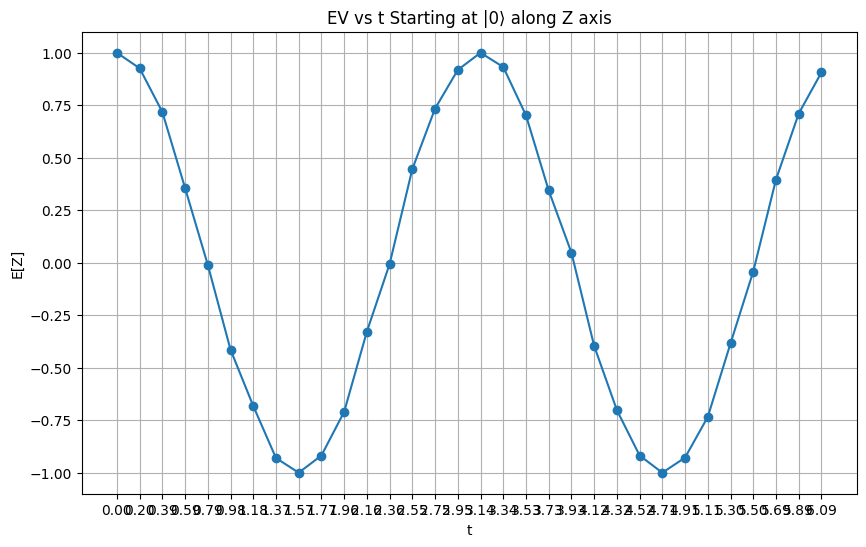

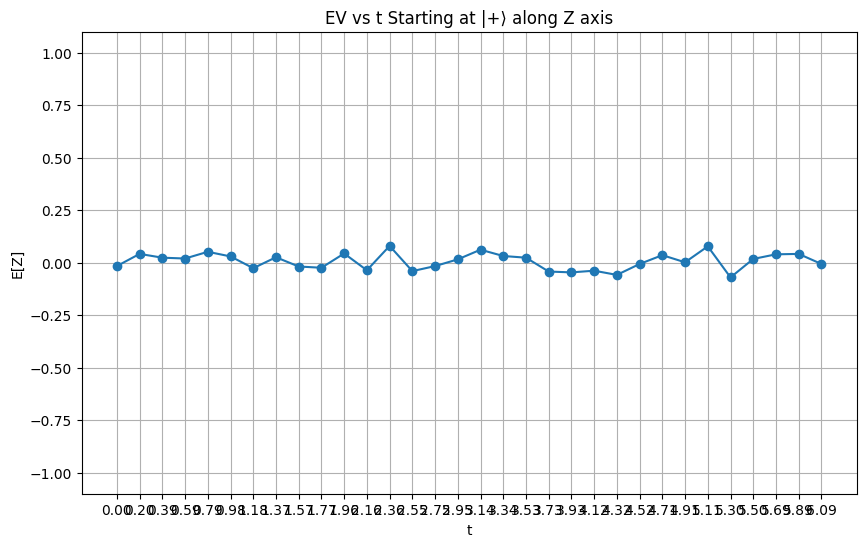

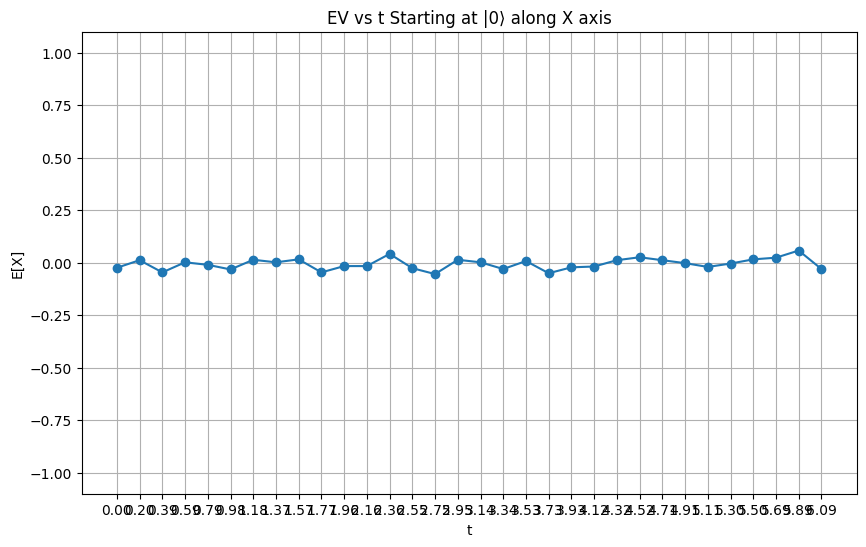

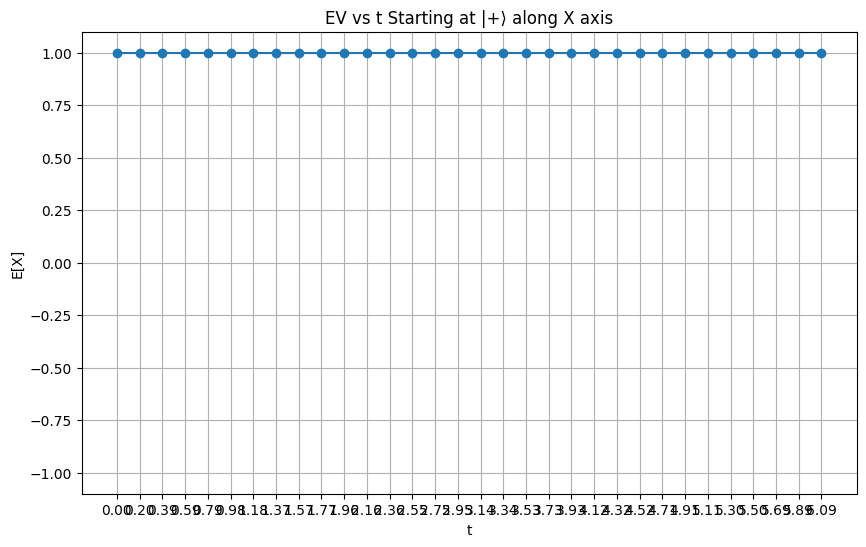

In [4]:
graph('0', 'z')
graph('+', 'z')
graph('0', 'x')
graph('+', 'x')